In [2]:
import numpy as np

#дані
ratings = np.array([1, 2, 3, 4, 5])
counts = np.array([120, 180, 320, 580, 800])
n = counts.sum()

#PMF
pmf = counts / n

#CDF
cdf = np.cumsum(pmf)

#математичне сподівання
E = np.sum(ratings * pmf)

#дисперсія і стандартне відхилення
Var = np.sum((ratings**2) * pmf) - E**2
sigma = np.sqrt(Var)

#P(X = 1 або 2)
p_n = pmf[0] + pmf[1]

#P(X >= 4)
p_p = pmf[3] + pmf[4]

#медіана
median = ratings[np.where(cdf >= 0.5)[0][0]]

print("PMF:")
for x, p in zip(ratings, pmf):
    print(f"P(X = {x}) = {p:.2f}")

print("\nCDF:")
for x, F in zip(ratings, cdf):
    print(f"F({x}) = {F:.2f}")

print("\nЧислові характеристики:")
print(f"E[X] = {E:.2f}")
print(f"Var(X) = {Var:.2f}")
print(f"σ = {sigma:.2f}")

print("\nЙмовірності:")
print(f"P(X ≤ 2) = {p_n:.2f}")
print(f"P(X ≥ 4) = {p_p:.2f}")

print(f"\nМедіана = {median}")

PMF:
P(X = 1) = 0.06
P(X = 2) = 0.09
P(X = 3) = 0.16
P(X = 4) = 0.29
P(X = 5) = 0.40

CDF:
F(1) = 0.06
F(2) = 0.15
F(3) = 0.31
F(4) = 0.60
F(5) = 1.00

Числові характеристики:
E[X] = 3.88
Var(X) = 1.45
σ = 1.20

Ймовірності:
P(X ≤ 2) = 0.15
P(X ≥ 4) = 0.69

Медіана = 4


In [3]:
import numpy as np
from scipy.stats import binom

#дані
n = 50
p = 0.88

#математичне сподівання
E = n * p

#дисперсія і стандартне відхилення
Var = n * p * (1 - p)
sigma = np.sqrt(Var)

#P(X = 50)
p_50 = binom.pmf(50, n, p)

#P(X = 45)
p_45 = binom.pmf(45, n, p)

#P(42 ≤ X ≤ 46)
p_42_46 = binom.cdf(46, n, p) - binom.cdf(41, n, p)

#P(запізнилось > 5)
p_late = binom.cdf(44, n, p)

print(f"E[X] = {E:.2f}")
print(f"Var(X) = {Var:.2f}")
print(f"σ = {sigma:.2f}")

print(f"P(X = 50) = {p_50:.4f}")
print(f"P(X = 45) = {p_45:.4f}")
print(f"P(42 ≤ X ≤ 46) = {p_42_46:.4f}")
print(f"P(Запізнилось > 5) = {p_late:.4f}")

E[X] = 44.00
Var(X) = 5.28
σ = 2.30
P(X = 50) = 0.0017
P(X = 45) = 0.1674
P(42 ≤ X ≤ 46) = 0.7263
P(Запізнилось > 5) = 0.5647


In [4]:
import numpy as np
from scipy.stats import expon

#дані
lam = 6  #на годину
rv = expon(scale=1/lam)

#математичне сподівання і стандартне відхилення
E = 1 / lam
sigma = 1 / lam

#P(T < 5 хв)
p_less_5 = rv.cdf(5/60)

#P(T > 15 хв)
p_more_15 = 1 - rv.cdf(15/60)

#P(5 < T < 15)
p_5_15 = rv.cdf(15/60) - rv.cdf(5/60)

#медіана
median = rv.ppf(0.5) * 60  #у хвилинах

print(f"E[T] = {E*60:.2f} хв")
print(f"σ = {sigma*60:.2f} хв")

print(f"P(T < 5 хв) = {p_less_5:.3f}")
print(f"P(T > 15 хв) = {p_more_15:.3f}")
print(f"P(5 < T < 15) = {p_5_15:.3f}")

print(f"Медіана = {median:.2f} хв")

E[T] = 10.00 хв
σ = 10.00 хв
P(T < 5 хв) = 0.393
P(T > 15 хв) = 0.223
P(5 < T < 15) = 0.383
Медіана = 6.93 хв


In [5]:
import numpy as np
from scipy.stats import t

#дані
x_bar = 76.8
mu0 = 72
s = 14.2
n = 35
alpha = 0.05
df = n - 1

#стандартна похибка
SE = s / np.sqrt(n)

#t-статистика
t_stat = (x_bar - mu0) / SE

#p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

#критичне t
t_crit = t.ppf(1 - alpha/2, df)

#довірчий інтервал
CI_low = x_bar - t_crit * SE
CI_high = x_bar + t_crit * SE

#рішення
decision = "H0 не вдхл" if p_value >= alpha else "H0 вдхл"

print(f"SE = {SE:.2f}")
print(f"t = {t_stat:.2f}")
print(f"p-value = {p_value:.4f}")

print(f"95% CI = ({CI_low:.2f}, {CI_high:.2f})")
print(f"Рішення: {decision}")

SE = 2.40
t = 2.00
p-value = 0.0536
95% CI = (71.92, 81.68)
Рішення: H0 не вдхл


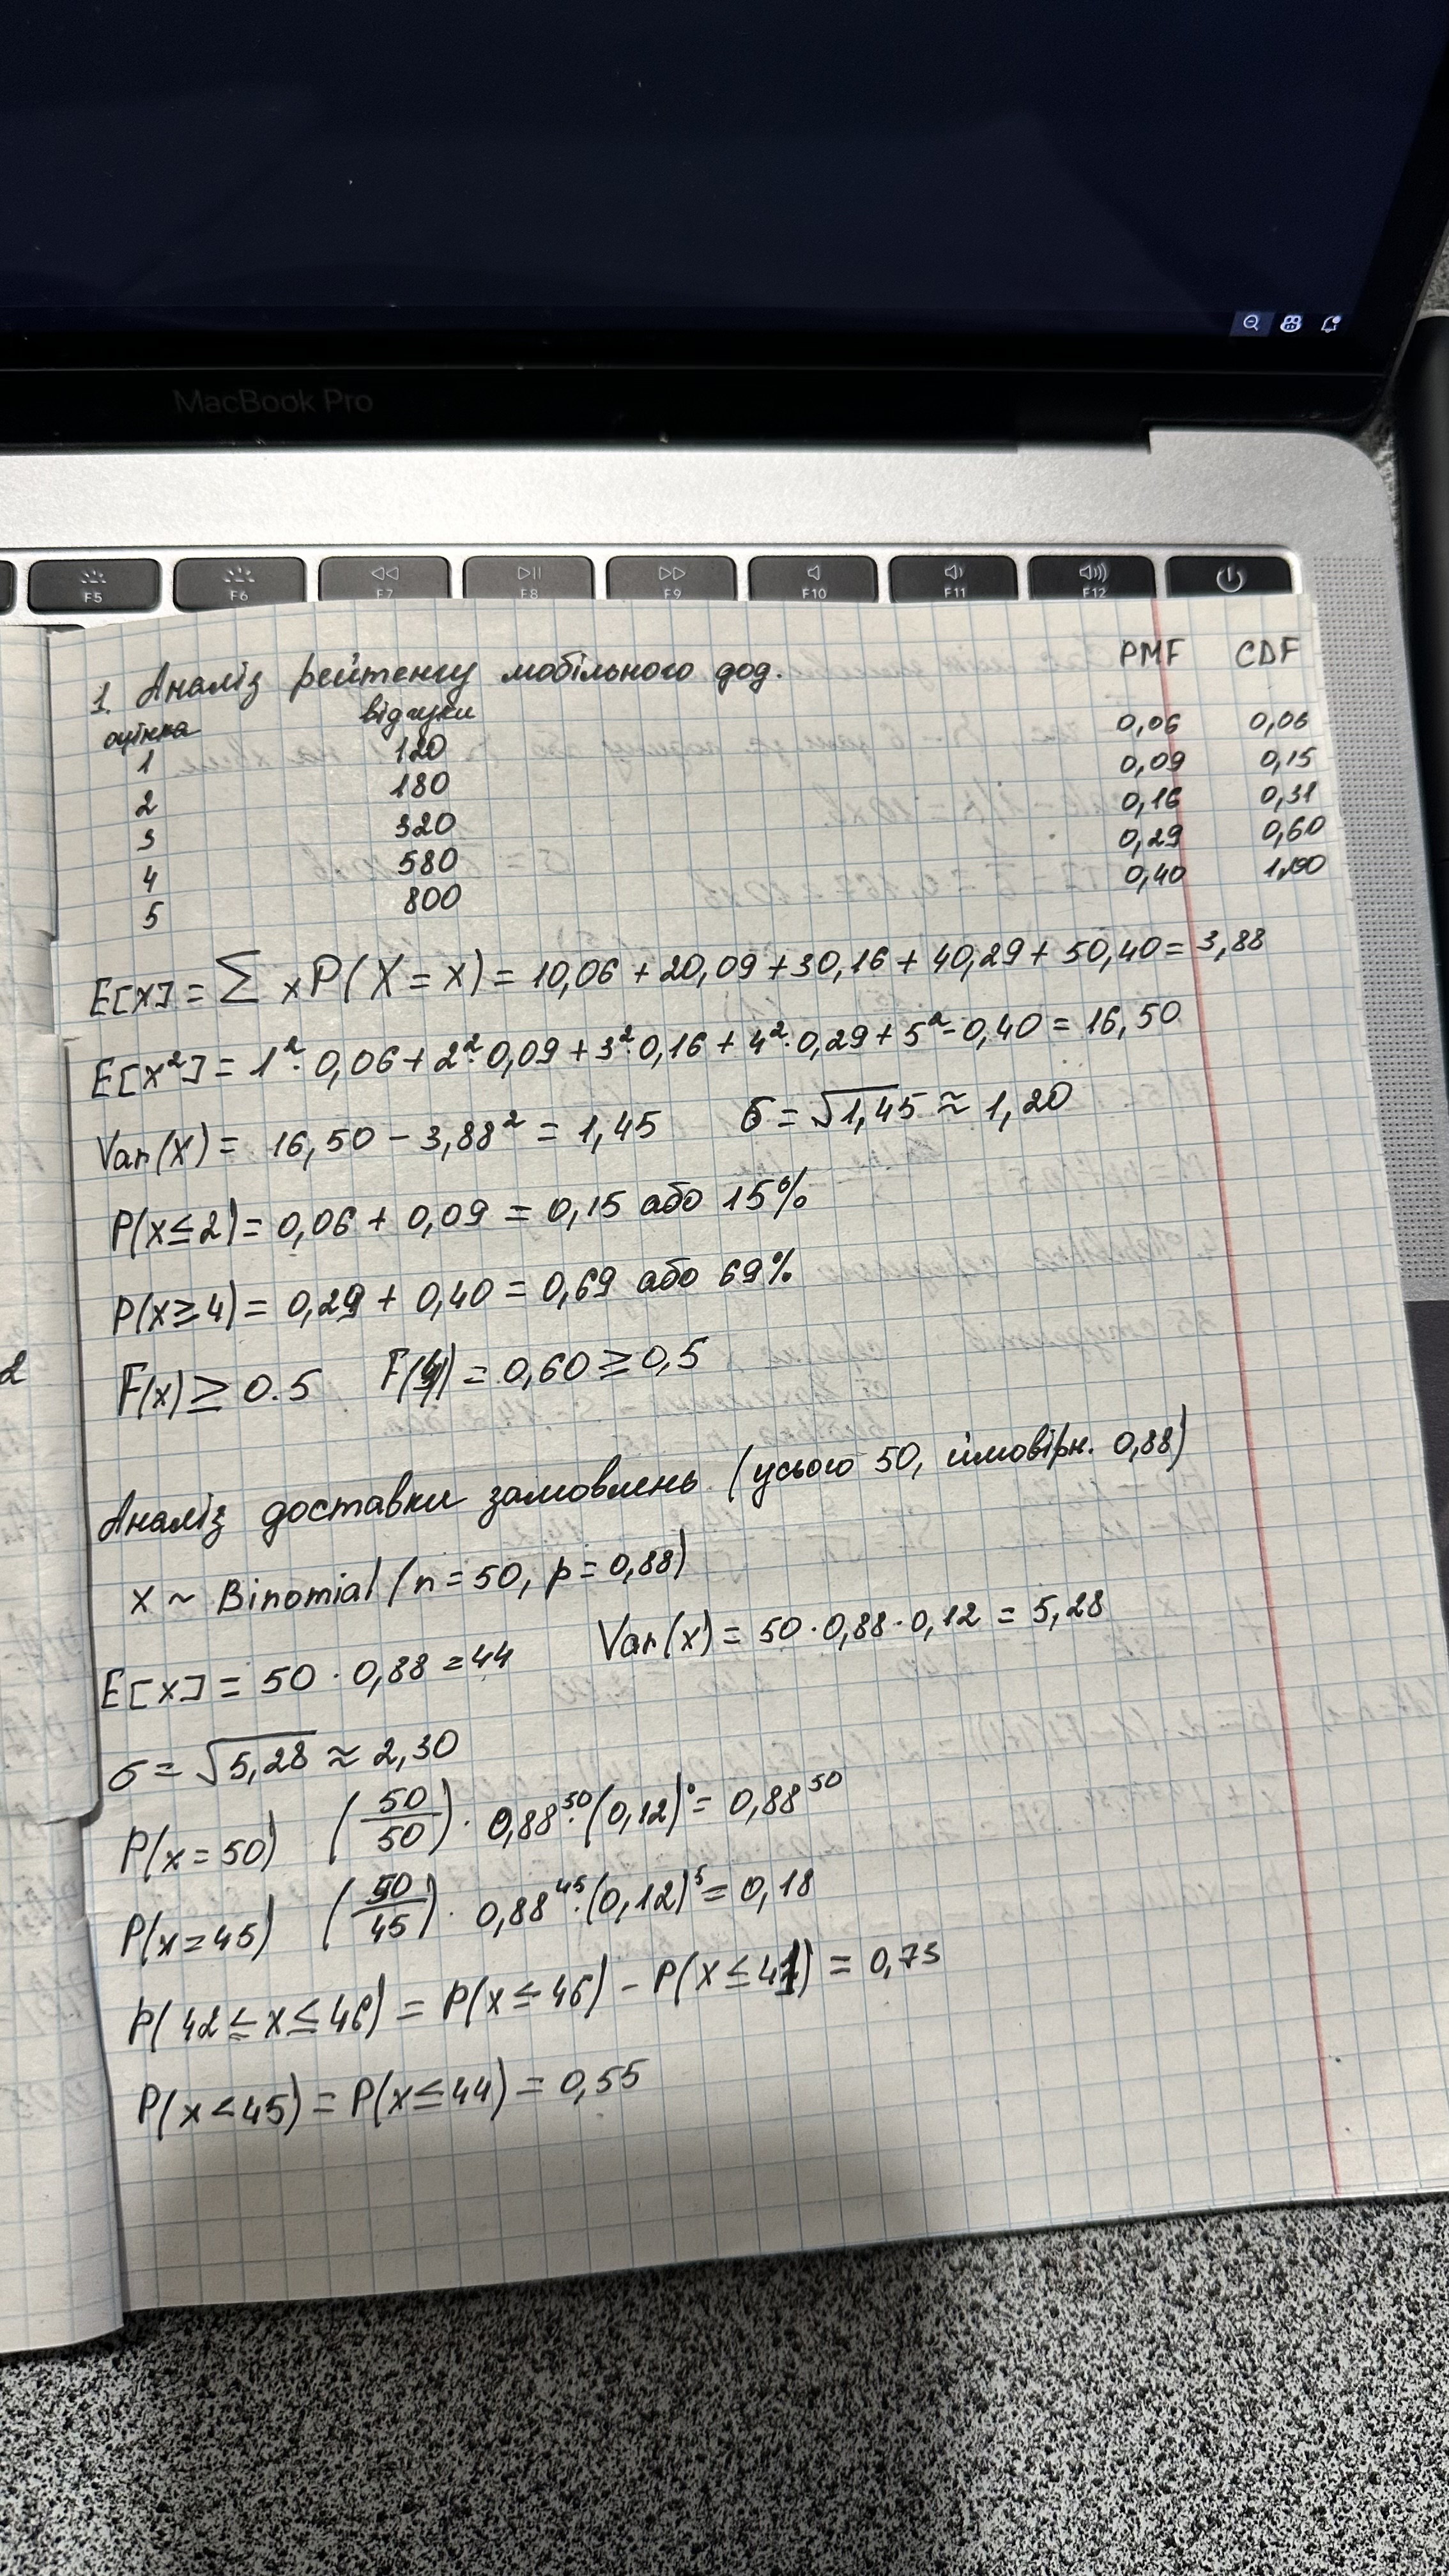 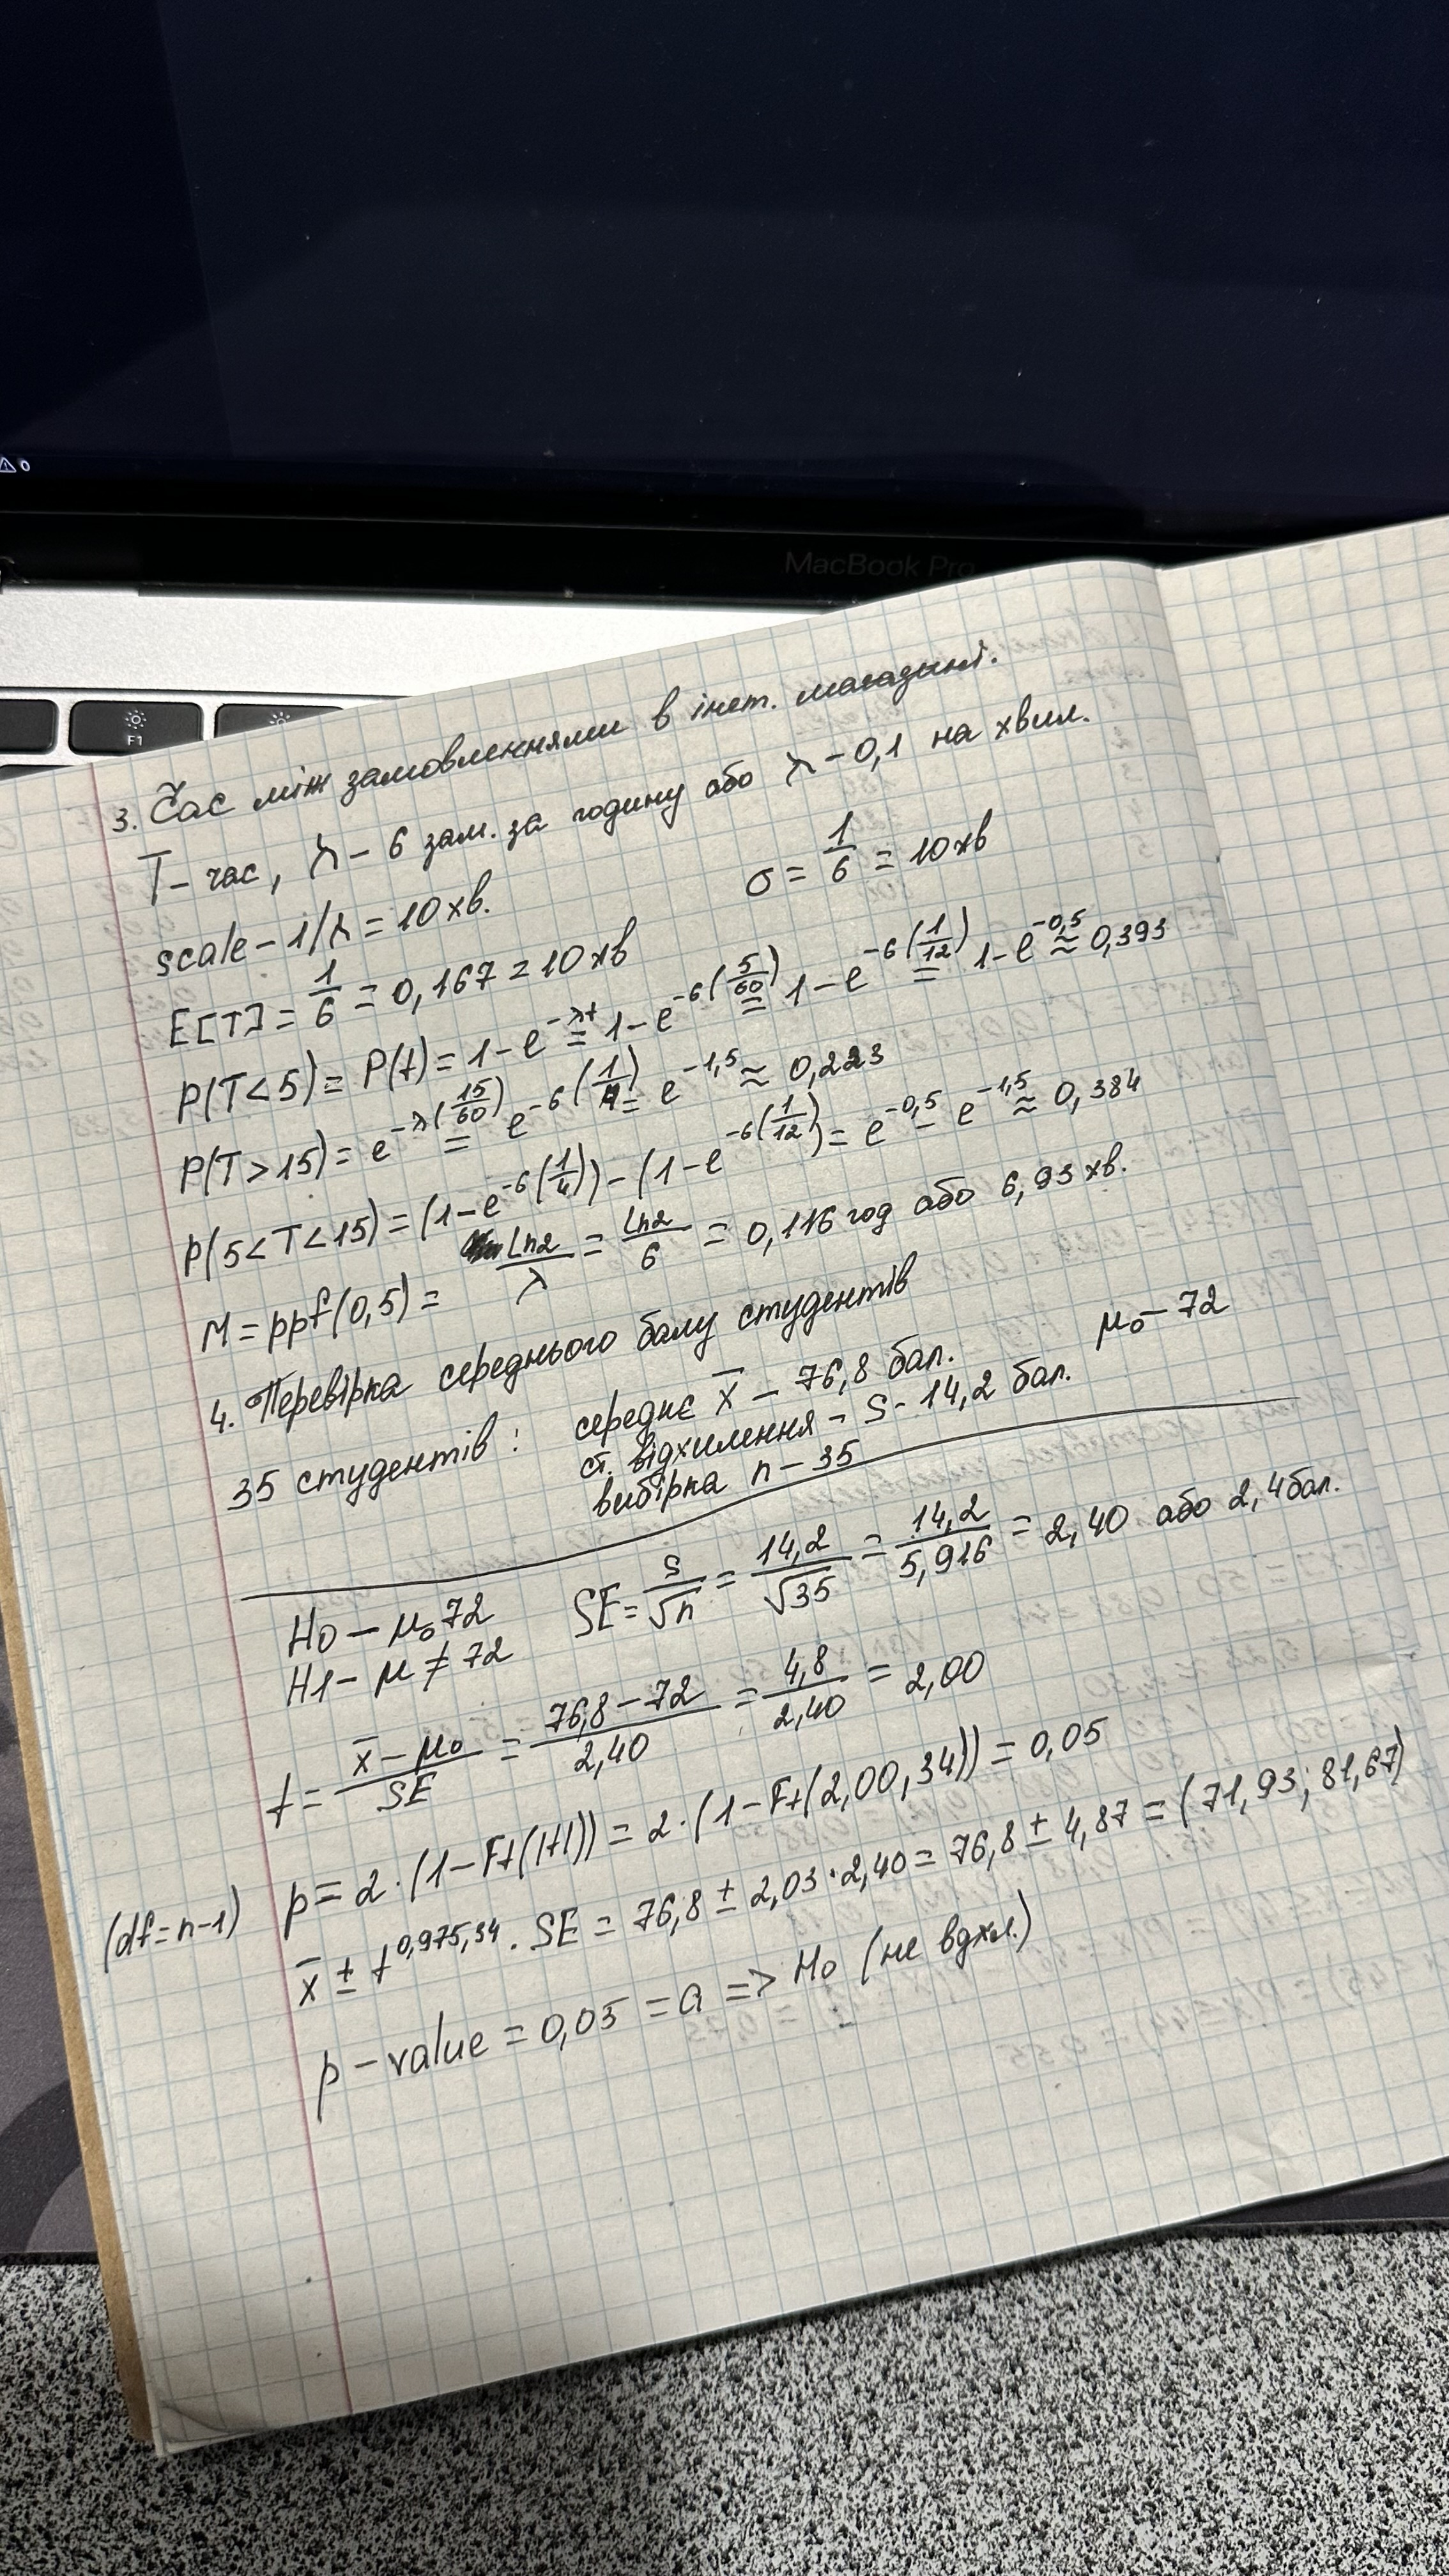